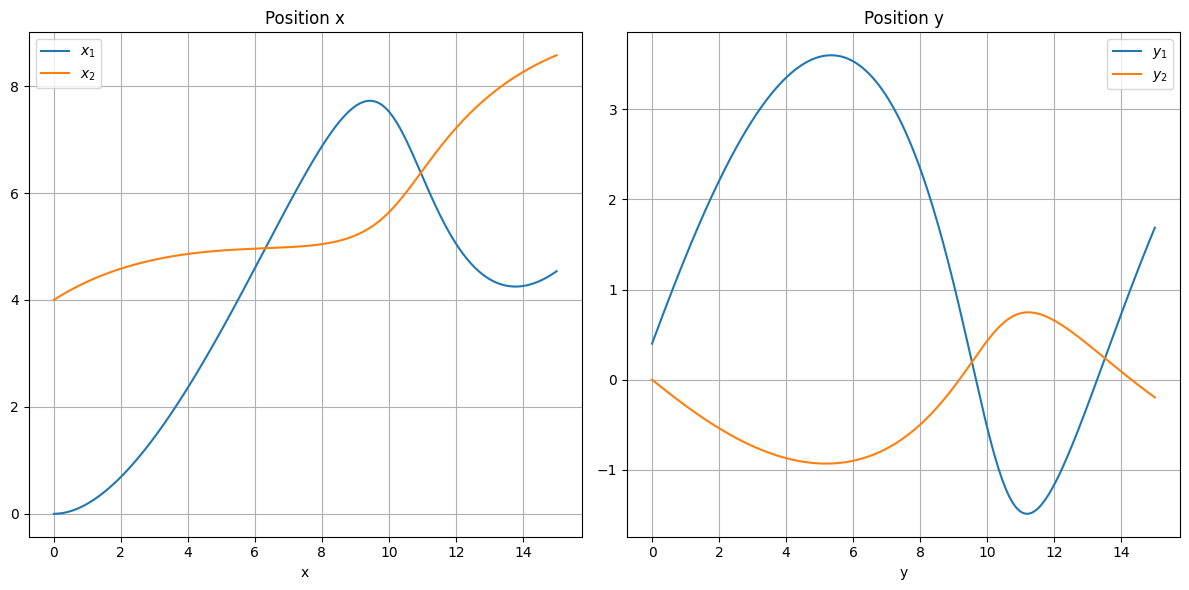

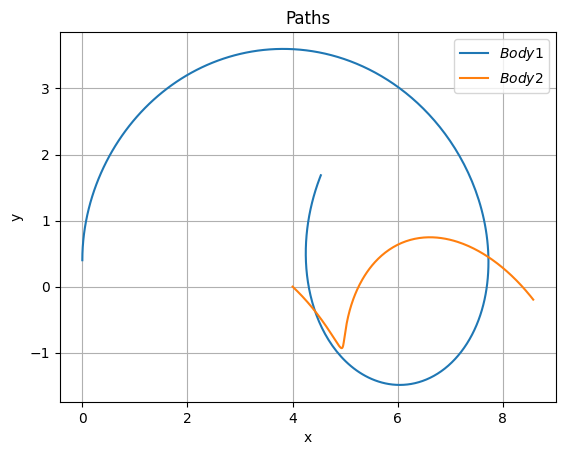

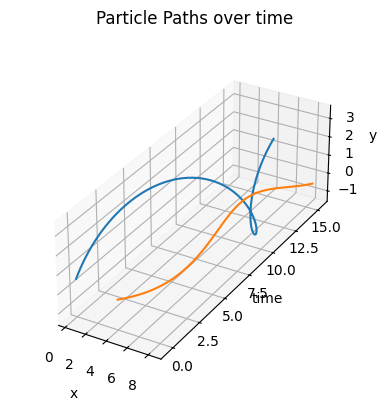

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### Simulate gravity ####
# assign constants
G = 6.6743 * 10**-11
m_1 = 9**11
m_2 = 10**11


# initial conditions
x_1_0=0
x_1_dot_0=0
x_2_0=4
x_2_dot_0=0.4
y_1_0=0.4
y_1_dot_0=1
y_2_0=0
y_2_dot_0=-0.3
x0 = np.array([x_1_0, x_1_dot_0, x_2_0,x_2_dot_0,y_1_0,y_1_dot_0,y_2_0,y_2_dot_0])

# System of ODE:
def Gravity_Sim_ODE(t, y):
    x_1 = y[0]
    x_1_dot = y[1]
    x_2 = y[2]
    x_2_dot = y[3]
    y_1 = y[4]
    y_1_dot = y[5]
    y_2 = y[6]
    y_2_dot = y[7]

    return (
        x_1_dot,
        G*m_2*(-x_1 + x_2)/(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2)**(3/2),
        x_2_dot,
        G*m_1*(x_1 - x_2)/(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2)**(3/2),
        y_1_dot,
        G*m_2*(-y_1 + y_2)/(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2)**(3/2),
        y_2_dot,
        G*m_1*(y_1 - y_2)/(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2)**(3/2)
    )

# solve the ODE, evaluate at 30 fps
sol = solve_ivp(Gravity_Sim_ODE, [0, 15], x0, 
    t_eval=np.linspace(0,15,10*30))

# output of the solver
x_1 = sol.y[0]
x_2 = sol.y[2]
y_1 = sol.y[4]
y_2 = sol.y[6]
t = sol.t

#plot x and y over time
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(t, x_1, label="$x_1$")
axs[0].plot(t, x_2, label="$x_2$")
axs[0].legend()
axs[0].grid()
axs[0].set_xlabel("time (s)")
axs[0].set_xlabel("x")
axs[0].set_title('Position x')

axs[1].plot(t, y_1, label="$y_1$")
axs[1].plot(t, y_2, label="$y_2$")
axs[1].legend()
axs[1].grid()
axs[1].set_xlabel("time (s)")
axs[1].set_xlabel("y")
axs[1].set_title('Position y')
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()
# paths of the two bodies:
plt.plot(x_1, y_1, label="$Body 1$")
plt.plot(x_2, y_2, label="$Body 2$")
plt.legend()
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title('Paths')
plt.show()
plt.close()

#paths over time (3d plot)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_1, t, y_1)
ax.plot(x_2, t, y_2)

# Add labels and title
ax.set_xlabel('x')
ax.set_ylabel('time')
ax.set_zlabel('y')
ax.set_title('Particle Paths over time')
ax.set_box_aspect([1, 3, 1])

plt.show()


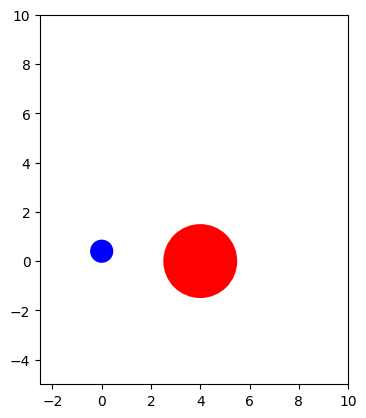

In [2]:
# Animate the spring pendulum
import matplotlib.animation as animation
from ffmpeg import FFmpeg
from PIL import Image
from matplotlib.lines import Line2D
from matplotlib.transforms import Affine2D
from matplotlib.patches import Circle
# output of the solver
x_1 = sol.y[0]
x_2 = sol.y[2]
t = sol.t

fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.set_xlim(-2.5, 10)
ax.set_ylim(-5, 10)

s_1= m_1/max([m_1,m_2])*1.5
s_2= m_2/max([m_1,m_2])*1.5


circle1 = ax.add_patch(Circle((x_1_0,y_1_0), s_1, fc='b'))
circle2 = ax.add_patch(Circle((x_2_0,y_2_0), s_2, fc='r'))

plt.show
plt.savefig('gravity_sim_2d.png')
#animate each frame "i"
def animate(i):

    px_1 = x_1[i]
    px_2 = x_2[i]
    py_1 = y_1[i]
    py_2 = y_2[i]
    circle1.set_center((px_1, py_1))
    circle2.set_center((px_2, py_2))
    

# save as video 30 fps
ani = animation.FuncAnimation(fig, animate, frames=len(t))
ani.save('gravity_sim_2d.gif', writer='pillow', fps=30)